# Assignment 7 (Logistic Regression)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. Data Exploration:

In [2]:
df = pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age distribution')

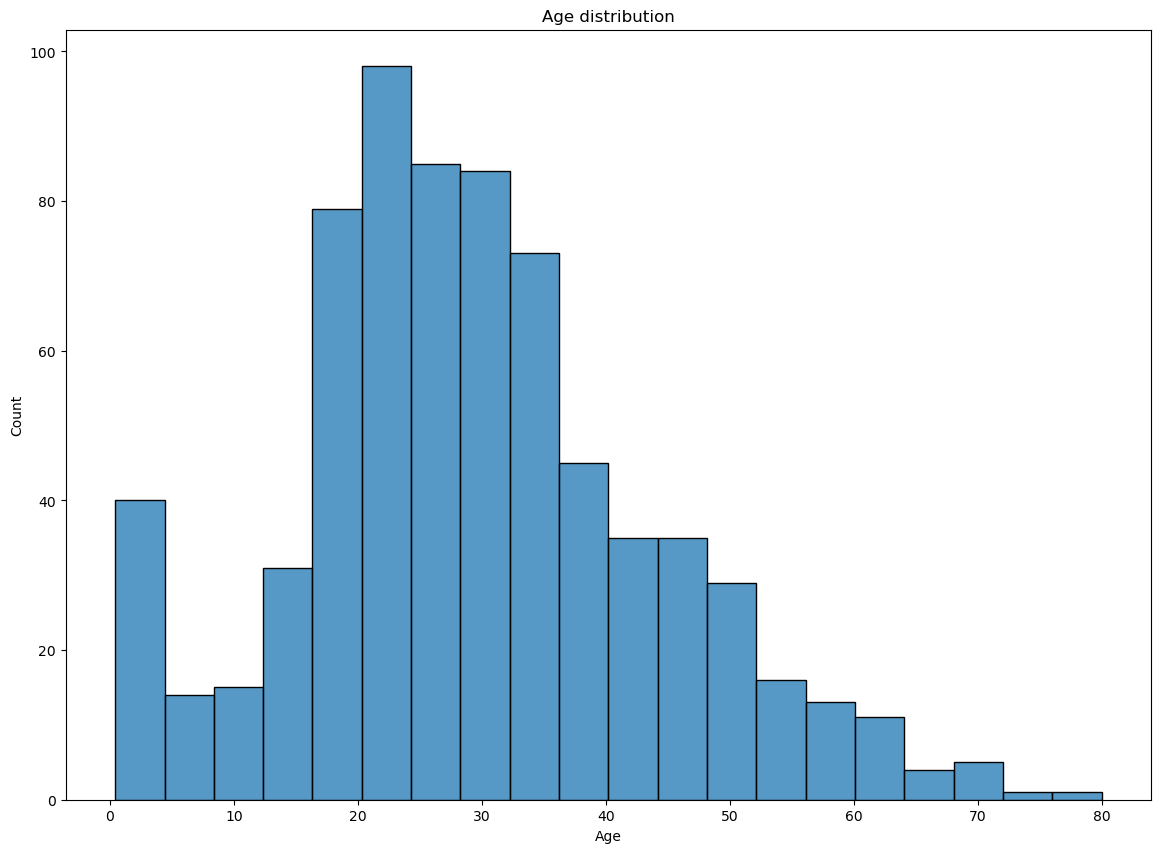

In [8]:
plt.figure(figsize=(14,10))
sns.histplot(df['Age'].dropna(), bins=20)
plt.title('Age distribution')

Text(0.5, 1.0, 'Fare distribution')

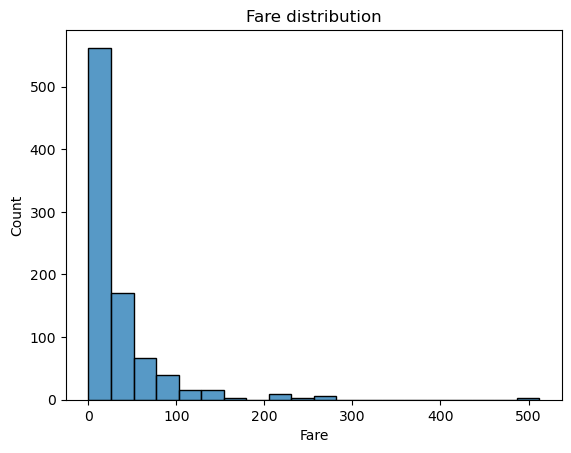

In [9]:
sns.histplot(df['Fare'].dropna(), bins=20)
plt.title('Fare distribution')

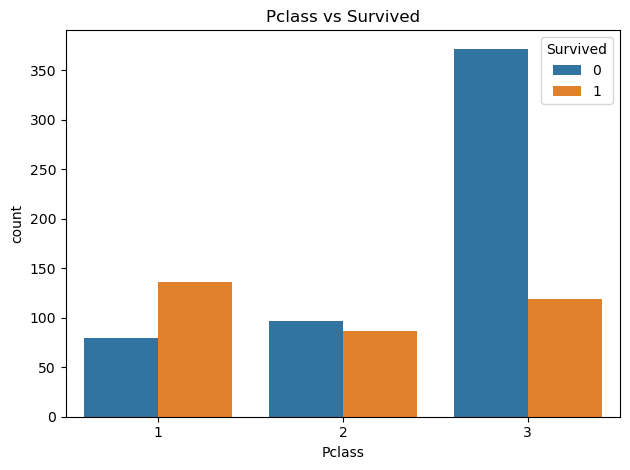

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass vs Survived')
plt.tight_layout()
plt.show()

### 2. Data Preprocessing

In [11]:
# drop columns that are not useful for modeling
drop_cols = [c for c in ['PassengerId','Name','Ticket','Cabin'] if c in df.columns]
df = df.drop(columns=drop_cols)

In [12]:
# Ensure target exists
if 'Survived' not in df.columns:
    raise ValueError("No 'Survived' column found in Titanic_train.csv")

# Choose features we want to use (only include those present)
wanted = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
features = [c for c in wanted if c in df.columns]
print("Using features:", features)

# Cast some to string (categorical)
for c in ['Pclass','Sex','Embarked']:
    if c in df.columns:
        df[c] = df[c].astype(str)

# Split numeric vs categorical automatically
numeric_features = df[features].select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = [c for c in features if c not in numeric_features]
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Using features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Numeric features: ['Age', 'SibSp', 'Parch', 'Fare']
Categorical features: ['Pclass', 'Sex', 'Embarked']


### 3. Model Building:

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [14]:
from sklearn.model_selection import train_test_split
X = df[features].copy()
y = df['Survived'].astype(int)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### 4. Model Evaluation

In [17]:
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)[:,1]

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

In [19]:

print("\nClassification report:\n", classification_report(y_val, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



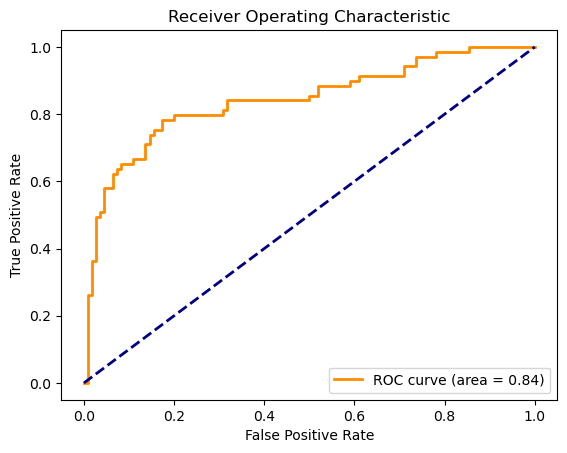

In [20]:
# Plot ROC
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 5. Interpretation:

In [21]:
# Get feature names after preprocessing
pre = clf.named_steps['preprocessor']
num_names = numeric_features
# categorical onehot names
ohe = pre.named_transformers_['cat'].named_steps['onehot']
cat_names = list(ohe.get_feature_names_out(categorical_features)) if hasattr(ohe, "get_feature_names_out") else []

feature_names = num_names + cat_names

coefs = clf.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs})
coef_df = coef_df.sort_values(by='coefficient', ascending=False).reset_index(drop=True)
display(coef_df.head(10))
print("\nTop positive features (increase survival probability):")
display(coef_df.head(5))
print("\nTop negative features (decrease survival probability):")
display(coef_df.tail(5))


,feature,coefficient
0,Sex_female,1.343245
1,Pclass_1,1.023698
2,Embarked_Q,0.266537
3,Embarked_nan,0.222802
4,Fare,0.131466
5,Pclass_2,0.129038
6,Embarked_C,0.012529
7,Parch,-0.069542
8,SibSp,-0.260258
9,Embarked_S,-0.415825



Top positive features (increase survival probability):


,feature,coefficient
0,Sex_female,1.343245
1,Pclass_1,1.023698
2,Embarked_Q,0.266537
3,Embarked_nan,0.222802
4,Fare,0.131466



Top negative features (decrease survival probability):


,feature,coefficient
8,SibSp,-0.260258
9,Embarked_S,-0.415825
10,Age,-0.491008
11,Pclass_3,-1.066692
12,Sex_male,-1.257200


##### pipeline + feature metadata

In [22]:
import pickle
with open("model_pipeline.pkl", "wb") as f:
    pickle.dump(clf, f)


In [23]:
# Save simple metadata to help Streamlit create UI
feature_meta = {}
for col in features:
    if col in numeric_features:
        feature_meta[col] = {
            'type': 'numeric',
            'min': float(df[col].min()),
            'max': float(df[col].max()),
            'median': float(df[col].median()),
            'is_int': bool(pd.api.types.is_integer_dtype(df[col]) or np.allclose(df[col].dropna() % 1, 0))
        }
    else:
        vals = sorted(df[col].dropna().unique().astype(str).tolist())
        feature_meta[col] = {
            'type': 'categorical',
            'values': vals,
            'most_freq': df[col].mode().iloc[0] if not df[col].mode().empty else None
        }

with open("feature_metadata.pkl", "wb") as f:
    pickle.dump({'features': features, 'meta': feature_meta}, f)

print("Saved model_pipeline.pkl and feature_metadata.pkl")


Saved model_pipeline.pkl and feature_metadata.pkl


In [24]:
#load saved pipeline and predict one sample
with open("model_pipeline.pkl", "rb") as f:
    loaded = pickle.load(f)

sample = X_val.iloc[[0]]
print("Sample input:")
display(sample)
print("Pred:", loaded.predict(sample)[0], "Prob(survive):", loaded.predict_proba(sample)[0][1])


Sample input:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
565,3,male,24.0,2,0,24.15,S


Pred: 0 Prob(survive): 0.0679779420832057


In [ ]:
#pip install -r requirements.txt
streamlit run app.py

### Interview question


Q1: What is the difference between precision and recall?
 - Precision: Out of all predicted positives, how many were correctly predicted as positives.
 * Recall: Out of all actual positives, how many were correctly predicted as positives.
     
 Q2: What is cross-validation, and why is it important in binary classification?
 * Cross-validation is a technique to split data into multiple training/testing sets to validate model performance.
 * It reduces overfitting and ensures the model generalizes well to unseen data.